<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/dl_pytorch/01_basic_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Based on lessons in [Deep Learning and Neural Networks with Python and Pytorch](https://www.youtube.com/watch?v=i2yPxY2rOzs)

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets


In [3]:
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 135133933.05it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31220539.65it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33168152.11it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 14142931.53it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [14]:
print(f"there are {len(train)} train and {len(test)} test examples")

there are 60000 train and 10000 test examples


In [15]:
print(train[0][0].shape)
print(test[0][0].shape)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


## Creating Dataloader

In [17]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

In [19]:
for X, y in trainset:
  print(X)
  print(y)
  break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [23]:
X, y = X[0], y[0]

In [33]:
X.shape

torch.Size([1, 28, 28])

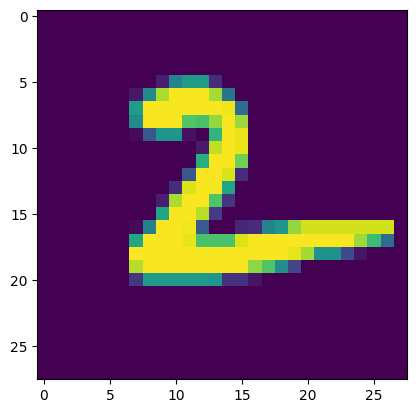

tensor(2)


In [38]:
import matplotlib.pyplot as plt
plt.imshow(X.view(28,28))
plt.show()
print(y)

### check balance in data

In [54]:
from collections import defaultdict
count = defaultdict(int)

for _, y in trainset:
  for record in y:
    count[int(record)]+=1

print(count)


defaultdict(<class 'int'>, {6: 5918, 4: 5842, 8: 5851, 3: 6131, 9: 5949, 1: 6742, 5: 5421, 7: 6265, 2: 5958, 0: 5923})


In [55]:
total = sum(count.values())
print(total)

60000


In [63]:
for c in count:
  print(f"""{c}, {count[c]}, {round(count[c]/total*100.,1)}%""")

6, 5918, 9.9%
4, 5842, 9.7%
8, 5851, 9.8%
3, 6131, 10.2%
9, 5949, 9.9%
1, 6742, 11.2%
5, 5421, 9.0%
7, 6265, 10.4%
2, 5958, 9.9%
0, 5923, 9.9%


Data seems balanced

## Build DL Model

In [68]:
import torch.nn as nn
import torch.nn.functional as F

In [100]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()

    #define layers
    n_classes = 10
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, n_classes)

  def forward(self, x):
    # pass data(x) through layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

net = Net()
# net(trainset)
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [101]:
net(X.view(-1, 28*28))

tensor([[-2.4330, -2.4340, -2.3266, -2.2518, -2.3367, -2.3150, -2.2223, -2.2317,
         -2.3009, -2.2035]], grad_fn=<LogSoftmaxBackward0>)

### Define optimizer and loss function

In [111]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

print("Checking data")
for data in range(EPOCHS):
  for data in trainset:
    X, y = data
    print(X.shape, y.shape)
    break

print(f"training models for {EPOCHS} epochs")
for data in range(EPOCHS):
  for data in trainset:
    X, y = data

    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

  print(loss)


Checking data
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
training models for 3 epochs
tensor(0.1763, grad_fn=<NllLossBackward0>)
tensor(0.3566, grad_fn=<NllLossBackward0>)
tensor(0.0972, grad_fn=<NllLossBackward0>)


### Test and Get accuracy

In [124]:
correct = 0
total = 0
n_class = 10

with torch.no_grad():
  for X, y in trainset:
    output = net(X.view(-1,28*28))
    # print(output)
    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
      total+=1
print(correct, total)
print(f"train accuract {round(correct/total*100,2)}%")

58302 60000
train accuract 97.17%


In [125]:
correct = 0
total = 0
n_class = 10

with torch.no_grad():
  for X, y in testset:
    output = net(X.view(-1,28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct+=1
      total+=1
print(correct, total)

print(f"test accuract {round(correct/total*100,2)}%")

9636 10000
test accuract 96.36%


## Vizualize the network using torchviz package

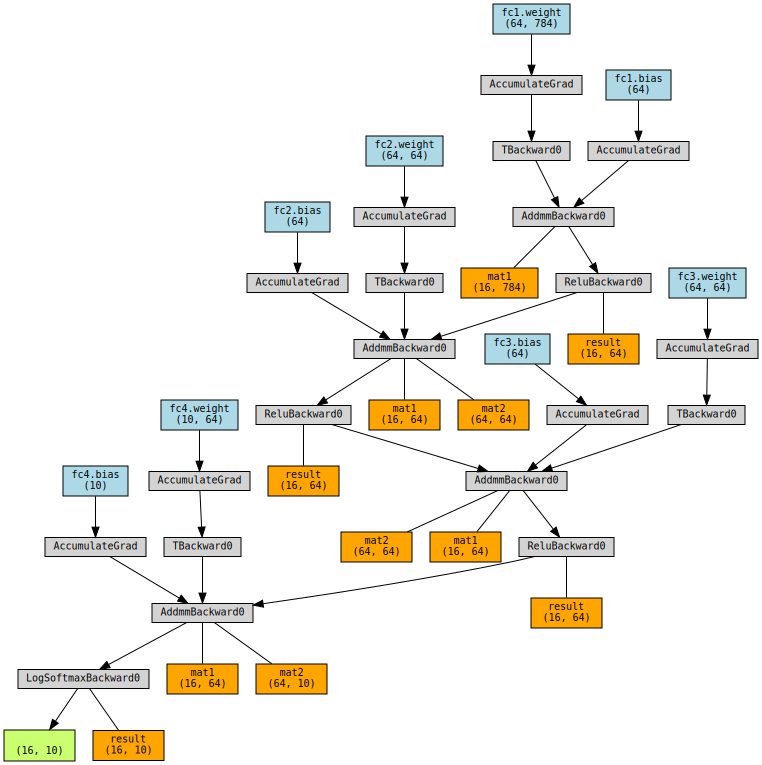

In [134]:
# !pip install torchviz

from torchviz import make_dot
y = net(X.view(-1,28*28))
make_dot(y, params=dict(net.named_parameters()),  show_attrs=False, show_saved=True)
